 
<h2 style="text-align: center; font-size: 18px; font-family: 'Times New Roman', serif;">TERM PROJECT 
<h2 style="text-align: center; font-size: 18px;
    font-family: 'Times New Roman', serif;"> GROUP-11
<h2 style="text-align: center; font-size: 18px;
    font-family: 'Times New Roman', serif;">ADVANCED MECHNICS OF SOLIDS
<h3 style="text-align: center; font-size: 18px;
    font-family: 'Times New Roman', serif;"> TITLE: STRESS DISTRIBUTION FOR A DISK SUBJECTED TO SELF-EQUILIBRATED ARBITARY LOADS <center>


#### PREPARED BY: 
Ankit Kumar Sharma (22ME63R20)\
Navin Pranjal (23ME63R24)\
Rajdeep Chatterjee (23ME63R26)\
Mukesh Kumar (23ME63R40)

###### (Group-11)


#### PROBLEM STATEMENT:
Here a disk is considered that is subjected to self-equlibrated loads  having arbitrary magnitudes 
and directions have been derived by following the approach of Timoshenko. According to this, stress field equations are simplifed  by the superposition of stress components determined using the solution to the problem of a concentrated load acting on a semi-infnite plate (Flamant's solution) and solution to the Lame’s problem.\
\
The proposed equations eliminate a series of involved and avoidable steps to be followed in the existing methods for stress determination, avoid the repeated computations in transforming the stresses from diferent coordinate systems, which makes these new equations computationally 
more eficient.
###### (Plane stress condition prevails)



NOTATIONS USED:\
\
$D$ = diameter of the disk\
$r$ = distance between the point of application and an arbitary point on the disk (chord)\
$h$ = thickness of the disk perpendicular to the board (much smaller than other two dimensions)\
$P$ = an arbitary concentrated load \
$\theta$ = angle between the line joining the point of application and center of the disk and the line of action of the load (in ccw) \
$\theta_1$, $\theta_2$ = angles between the line of action of the load and the chords $BA$ and $CA$, respectively\
$\alpha$ = angle between the radial line $BO$ and positive x-direction\
$\beta$ = angle between the vertical direction and the line joining the point of application of load and the point $A$\
$\gamma$ = the angle between the vertical direction and the line joining the point of application and the center of the disk\
$x$, $y$ = positional coordinates (x, y) of $A$\
$\sigma_{rr}$ = stress Concentrated load acting on a semi‑infnite plate (Flamant’s problem)\
$\sigma_{hyd}$ =  stress due to radial tension\
$\sigma_x$, $\sigma_y$, $\tau_{xy}$ = components of stresses in the Cartesian coordinate system\
\
(All dimensions are in mm)

#### STEPS TO BE FOLLOWED:
##### 1. Considering Concentrated load acting radially on a semi‑infnite plate (Flamant’s problem)
- Evaluting radial stress expression generated on the periphery due to that radial conentration load.

##### 2. Approaching Disk subjected to arbitrary non-radial loads (solution given by Timoshenko)
-  If ‘n’ number of loads are acting on a disk in static equilibrium, the stresses that need to be applied at the boundary of the disk to obtain the similar stress distribution.

##### 3. Stress feld in Cartesian coordinate system for the disk subjected to arbitrary loads
- for each load, namely, P1, P2 and P3, the origins of the coordinate systems based on which the stresses are computed vary. This necessitates suitable coordinate transformations before summing the stress components.

##### 4. Obtaining The closed-form solution for the stresses acting on a disk subjected to loads of arbitrary magnitudes and directions

##### 5. Establish the variation of stress components in polar and Cartesian coordinate system from experimental data


In [1]:
import sympy as sp

In [2]:
from sympy import Symbol, Sum

In [3]:
from IPython.display import Math, Latex

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

#### Step 1: Concentrated load acting on a semi‑infnite plate (Flamant’s problem)

Considering an infinite half-space in $x \geq 0$, A point load, $P$, acts vertically at the origin.  The force-balance can be expressed as: \begin{gather}
 \int_{-\pi/2}^{\pi/2} \sigma_{rr} \cos\theta \; r {\rm d} \theta = - P \tag{1}\
 \end{gather}\
 As we can see the right side is having constant value which is $P$ and left side is integrated with respect to $\theta$, so $r$ must be eliminated. For that purpose $\sigma_{rr}$ need to be in the form $\sigma{rr}$ = $\frac{h(\theta)}{r}$.\
 Evenually we will be left with $\sigma_{rr}$ in terms of a generic Airy stress function.

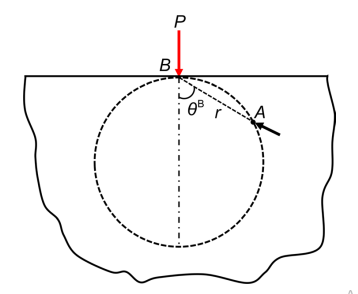
Fig-01: Concentrated load acting on a semi-infnite plate


From the figure we can say $\theta$ = $\theta_1$

In [6]:
D, r, h, theta,theta_B, theta_1, theta_2, alpha, beta, gamma  = sp.symbols('D, r, h, theta, theta_B, theta_1, theta_2, alpha, beta, gamma')

In [7]:
i, n, bc, x, y, x1, y1 = sp.symbols('i, n, bc, x, y, x1, y1')

begining with $x = r \cos\theta$ and $y = r\sin \theta$. Then, we get 
 \begin{align}
 \frac{\partial r}{\partial x} &= \cos \theta \tag{2}\\
 \frac{\partial r}{\partial y} &= \sin \theta \tag{3}\\
 \frac{\partial \theta}{\partial x} & = - \frac{\sin \theta}{r} \tag{4} \\
 \frac{\partial \theta}{\partial y} & = \frac{\cos \theta}{r} \tag{5} \\
 \end{align}


In [8]:
delr_delx = sp.cos(theta)

delr_dely = sp.sin(theta)

deltheta_delx = -sp.sin(theta)/r

deltheta_dely = sp.cos(theta)/r

In [9]:
def del_delx(f):
    return delr_delx*sp.diff(f,r,1) + deltheta_delx*sp.diff(f,theta,1)

def del_dely(f):
    return delr_dely*sp.diff(f,r,1) + deltheta_dely*sp.diff(f,theta,1)

In [10]:
def del2_delx2(f):
    return del_delx(del_delx(f))

def del2_dely2(f):
    return del_dely(del_dely(f))

In [11]:
def polarLaplacian(f):
    return (del2_delx2(f)+del2_dely2(f))

Let $\phi$ be a Airy stress function that is function of $r$ and $\theta$.

In [12]:
phi = sp.Function('phi')(r,theta)

In [13]:
phi

phi(r, theta)

In [14]:
def polarLaplacian(f):
    return (del2_delx2(f)+del2_dely2(f)).simplify()

In [15]:
polarLaplacian(phi)

Derivative(phi(r, theta), (r, 2)) + Derivative(phi(r, theta), r)/r + Derivative(phi(r, theta), (theta, 2))/r**2

In [16]:
def polarbiharmonic(f):
    return polarLaplacian(polarLaplacian(f))

In [17]:
polarbiharmonic(phi)

(r**4*Derivative(phi(r, theta), (r, 4)) + 2*r**3*Derivative(phi(r, theta), (r, 3)) - r**2*Derivative(phi(r, theta), (r, 2)) + 2*r**2*Derivative(phi(r, theta), (r, 2), (theta, 2)) + r*Derivative(phi(r, theta), r) - 2*r*Derivative(phi(r, theta), r, (theta, 2)) + 4*Derivative(phi(r, theta), (theta, 2)) + Derivative(phi(r, theta), (theta, 4)))/r**4

we know the expressions of stresses in cartesian coordinate systen:\
$\displaystyle \sigma_{xx} = \frac{\partial^2 \phi}{\partial y^2}$, $\displaystyle \sigma_{yy} = \frac{\partial^2 \phi}{\partial x^2}$, and $\displaystyle \sigma_{xy} = -\frac{\partial^2 \phi}{\partial x \partial y}$

Transformation expression of stress Matrix:  \begin{gather}
 \bar{\bar{\sigma}}_{\rm pol} = \bar{\bar{Q}} \; \bar{\bar{\sigma}}_{\rm rect} \; \bar{\bar{Q}}^{\sf T}
 \end{gather}

where, $\displaystyle \bar{\bar{\sigma}}_{\rm rect} = \begin{bmatrix} \sigma_{xx} & \sigma_{xy} \\ \sigma_{xy} & \sigma_{yy}\end{bmatrix}$ and $\displaystyle \bar{\bar\sigma}_{\rm pol} = \begin{bmatrix} \sigma_{rr} & \sigma_{r\theta} \\ \sigma_{r\theta} & \sigma_{\theta\theta}\end{bmatrix}$ through Rotation Matrix $\bar{\bar{Q}} = \displaystyle \begin{bmatrix} \cos \theta & \sin \theta \\ -\sin \theta & \cos \theta \end{bmatrix}$



In [18]:
def sigma_xx(f):
    return del2_dely2(f)

def sigma_yy(f):
    return del2_delx2(f)

def sigma_xy(f):
    return -del_delx(del_dely(f))

Defining Stress matrix ($\bar{\bar{\sigma}}_{\rm rect}$) in Cartesian coordinates

In [19]:
def sigma_rect(f):
    return sp.Matrix([[sigma_xx(f), sigma_xy(f)],[sigma_xy(f), sigma_yy(f)]])

The rotation matrix, $\bar{\bar{Q}}$

In [20]:
Q = sp.Matrix([[sp.cos(theta), sp.sin(theta)],[-sp.sin(theta), sp.cos(theta)]])

Defining Stress matrix ($\bar{\bar{\sigma}}_{\rm pol}$) in Polar coordinates

In [21]:
def sigma_polar(f):
    return Q*sigma_rect(f)*(Q.T)

In [22]:
def sigma_rr(f):
    return (sigma_polar(f)[0,0]).simplify().expand()

def sigma_tt(f):
    return (sigma_polar(f)[1,1]).simplify().expand()

def sigma_rt(f):
    return (sigma_polar(f)[0,1]).simplify().expand()

In [23]:
sigma_rr(phi)

Derivative(phi(r, theta), r)/r + Derivative(phi(r, theta), (theta, 2))/r**2

In [24]:
sigma_tt(phi)

Derivative(phi(r, theta), (r, 2))

In [25]:
sigma_rt(phi)

-Derivative(phi(r, theta), r, theta)/r + Derivative(phi(r, theta), theta)/r**2

In [26]:
def sigma_tr(f):
    return (sigma_polar(f)[1,0]).simplify().expand()

In [27]:
sigma_tr(phi)

-Derivative(phi(r, theta), r, theta)/r + Derivative(phi(r, theta), theta)/r**2

Note: $\sigma_{tr}(phi)$ is exactly the same as $\sigma_{rt}(phi)$, beacuse of the symmetricity of the stress tensor.

In [28]:
phi = sp.Function('phi')(r,theta)
sigma_rr(phi)

Derivative(phi(r, theta), r)/r + Derivative(phi(r, theta), (theta, 2))/r**2

In [29]:
g = sp.Function('g')(theta)
phi = r*g

From above we can deduce: $\phi = r g(\theta)$

So, the polar biharmonic equation can be of the form:

In [30]:
polarbiharmonic(phi)

(g(theta) + 2*Derivative(g(theta), (theta, 2)) + Derivative(g(theta), (theta, 4)))/r**3

Rewritting $g(\theta)$ in a  different form given as:

In [31]:
sp.dsolve(polarbiharmonic(phi),g)

Eq(g(theta), (C1 + C2*theta)*exp(-I*theta) + (C3 + C4*theta)*exp(I*theta))

In [32]:
A, B, C, D = sp.symbols('A, B, C, D')
gnew = A*sp.cos(theta) + B*theta*sp.cos(theta) + C*sp.sin(theta) + D*theta*sp.sin(theta)
display(Math(r'g(\theta) = {}'.format(sp.latex(gnew))))

<IPython.core.display.Math object>

Finding the expressions of $\sigma_{rr}$, $\sigma_{\theta\theta}$, and $\sigma_{r\theta}$.

In [33]:
phi = r*gnew
sigmarr = sigma_rr(phi)
display(Math(r'\sigma_{{rr}} = {}'.format(sp.latex(sigmarr))))

sigmatt = sigma_tt(phi)
display(Math(r'\sigma_{{\theta\theta}} = {}'.format(sp.latex(sigmatt))))

sigmart = sigma_rt(phi)
display(Math(r'\sigma_{{r\theta}} = {}'.format(sp.latex(sigmart))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

we found that $h(\theta) = -2B\sin\theta + 2D\cos\theta$. But $h(\theta)$ must be symmetric in $\theta$ about $\theta=0$. Therefore, it gives rise of $B=0$.

Thus the expression of $\sigma_{rr}$ becomes:

In [34]:
sigmarr = sigmarr.subs(B,0)
display(Math(r'\sigma_{{rr}} = {}'.format(sp.latex(sigmarr))))

<IPython.core.display.Math object>

In [35]:
P = sp.symbols('P')
lhs = sp.integrate(r*sigmarr*sp.cos(theta)*h,(theta,-sp.pi/2,sp.pi/2))
rhs = -P
eq = sp.Eq(lhs,rhs)
display(eq)

Eq(pi*D*h, -P)

In [36]:
Dsoln = -P/(h*sp.pi)
display(Math(r'D = {}'.format(sp.latex(Dsoln))))

<IPython.core.display.Math object>

Thus the final expression of $\sigma_{rr}$ as given below.

In [37]:
sigmarr_soln = sigmarr.subs(D,Dsoln)
display(Math(r'\sigma_{{rr}}^{{\rm soln}} = {}'.format(sp.latex(sigmarr_soln))))

<IPython.core.display.Math object>


$\sigma_{\theta \theta}$, $\tau_{r \theta} = 0$

To avoid confusion with the existing notations used in the analytical solution, we better replace $\theta$ with $\theta_B$.
(This doesn't hold any other meaning)

In [38]:
sigmarr_soln = sigmarr_soln.subs(theta,theta_B)
display(Math(r'\sigma_{{rr}}^{{\rm soln}} = {}'.format(sp.latex(sigmarr_soln))))

<IPython.core.display.Math object>

#### Step 2: Disk subjected to arbitrary loads (solution given by Timoshenko)

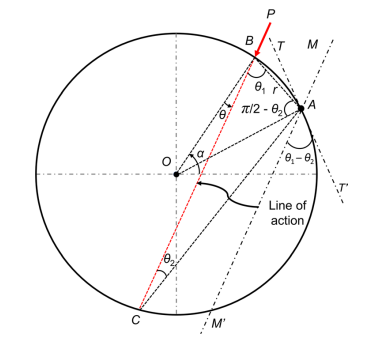
Fig-02: Arbitrary concentrated load acting on a disk

 Let the radial stress acting along the direction of chord $BA$ is $\sigma_r$, then, the normal and tangential stresses acting on the boundary of the disk at point $A$ with respect to a polar coordinate system with point $O$ as the origin can be expressed as:

$\sigma_{r_0}$ = $\sigma_r$ *$\sin^2(\theta_2)$

$\tau_{r\theta_0}$ = -$\sigma_r$ *$\sin(\theta_2)$*$\cos(\theta_2)$


In [39]:
sigmar_0 = sigmarr*sp.sin(theta_2)**2
taurt_0 = -sigmarr*sp.sin(theta_2)*sp.cos(theta_2)

Substituting the value of $\sigma_r$ from the Flamant’s solution;

In [40]:
sigmar_0 = sigmar_0.subs(sigmarr,sigmarr_soln)
taurt_0 = taurt_0.subs(sigmarr,sigmarr_soln)
display(Math(r'\sigma_{{r_0}} = {}'.format(sp.latex(sigmar_0))))
display(Math(r'\tau_{{r\theta_0}} = {}'.format(sp.latex(taurt_0))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In Timoshenko's solution $\theta_1$ is representing $\theta_B$ as per the Flamant's solution.\
i.e. $\theta_B$ = $\theta_1$ 

Therefore substituting $\theta_1$ in the expression of radial stress expression;



In [41]:
sigmar_0 = sigmar_0.subs(theta_B, theta_1)
taurt_0 = taurt_0.subs(theta_B, theta_1)
display(sigmar_0, taurt_0 )

-2*P*sin(theta_2)**2*cos(theta_1)/(pi*h*r)

2*P*sin(theta_2)*cos(theta_1)*cos(theta_2)/(pi*h*r)

Further substituting $r$ = $D$*$\sin(\theta_2)$ in above equations;

In [42]:
sigmar_0 = sigmar_0.subs(r, D*sp.sin(theta_2)).simplify()
taurt_0 = taurt_0.subs(r, D*sp.sin(theta_2)).simplify()
display(Math(r'\sigma_{{r_0}} = {}'.format(sp.latex(sigmar_0))))
display(Math(r'\tau_{{r\theta_0}} = {}'.format(sp.latex(taurt_0))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

After simplification these terms can also be represented as follows:

$\sigma_{r_0}$ = $-\frac{p}{\pi*h*D}$*$\sin(\theta_1+\theta_2)$ + $\frac{p}{\pi*h*D}$*$\sin(\theta_1-\theta_2)$

$\tau_{r\theta_0}$ = $\frac{p}{\pi*h*D}$*$\cos(\theta_1+\theta_2)$ + $\frac{p}{\pi*h*D}$*$\cos(\theta_1-\theta_2)$

The stresses in above equations can be considered as a superposition of three stresses viz.,

(i) radial stress of magnitude $-\frac{p}{\pi*h*D}$*$\sin(\theta_1+\theta_2)$  distributed uniformly on the boundary of the disk,

(ii) tangential stress of magnitude $\frac{p}{\pi*h*D}$*$\cos(\theta_1+\theta_2)$ distributed uniformly on the boundary of the disk, and

(iii) stress with normal and tangential components as $\frac{p}{\pi*h*D}$*$\sin(\theta_1-\theta_2)$ and     $\frac{p}{\pi*h*D}$*$\cos(\theta_1-\theta_2)$ respectively.


The angle between the line $MM’$ (parallel to the line of 
action of force $P$) and tangent $TT’$ is $\theta_1$ –$\theta_2$ (Fig. 2), which implies that $\frac{p}{\pi*h*D}$*$\sin(\theta_1-\theta_2)$ and $\frac{p}{\pi*h*D}$*$\cos(\theta_1-\theta_2)$ are the components of stress with magnitude $\frac{p}{\pi*h*D}$ acting in a direction opposite to force P at point A.



from Geometry we have: $\theta_1$+$\theta_2 = \frac{\pi}{2}-\theta$

(i) Normal stress $\sum_{i=m}^{n}$$-\frac{p_i}{\pi*h*D}$*$\sin(\theta_1+\theta_2)_i$ = $\sum_{i=m}^{n}$$-\frac{p_i}{\pi*h*D}$*$\cos(\theta)_i$ distributed uniformly on the boundary of the disk.

Tangential stress of magnitude $\sum_{i=m}^{n}$$\frac{p_i}{\pi*h*D}$*$\cos(\theta_1+\theta_2)_i$ distributed uniformly on the boundary of the disk. 

In [43]:
P_i, theta_i = sp.symbols('P_i, theta_i') 

for $\displaystyle i^{th}$ load; 

In [44]:
sigma_t = P_i/(sp.pi*h*D)*sp.cos(theta_i)
display(Math(r'\sigma_t = {}'.format(sp.latex(sigma_t))))

<IPython.core.display.Math object>

In [45]:
Torque_ith = sigma_t*(sp.pi*D*h)*D/2
display(Torque_ith)

D*P_i*cos(theta_i)/2

By invoking the torque balance equation for the disk, the 
summation of the torques wrt the center
must be zero, i.e., $\sum_{i=1}^{n}$$\frac{p_i}{2}$*$\cos(\theta_1+\theta_2)_i$*$D = 0$.

Summation of the stresses obtained from the vector sum 
of $\frac{p}{\pi*h*D}$*$\sin(\theta_1-\theta_2)$ and     $\frac{p}{\pi*h*D}$*$\cos(\theta_1-\theta_2)$ which would be zero by invoking the force balance equations for the disk.

So the only remaining stress is the radial compressive stress  of magnitude $\sum_{i=m}^{n}$$-\frac{p_i}{\pi*h*D}$*$\cos(\theta)_i$.
Now Since the boundary of the disk is stress-free except at the points of application of loads, the effect of this term should be nullifed. This can be achieved by applying a uniform radial tension of the same magnitude on the boundary of the disk.


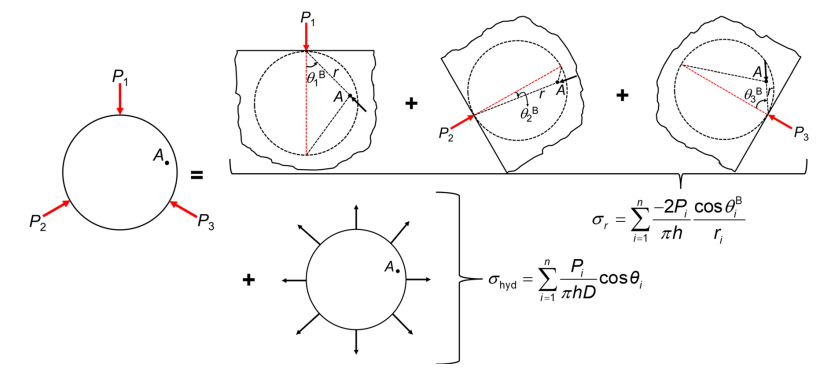
Fig-03: Demonstration of Timoshenko’s solution for the problem of a disk subjected to three radial loads


#### Step 3: Stress feld in Cartesian coordinate system for the disk subjected to arbitrary loads

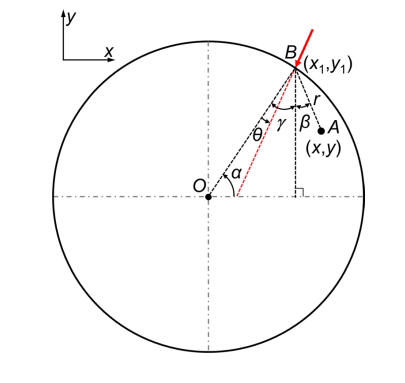
Fig-04: Defnition of angles β and γ


Again coming back to the previous notation used in Flamant's solution i.e. $\theta_B$, the angle between the line of action of the load and the line joining the point of application of load and point A.

Recalling again the final expression of $\sigma_{{rr}}^{{\rm soln}}$

In [46]:
sigmarr_soln = sigmarr_soln.subs(theta, theta_B)
display(Math(r'\sigma_{{rr}}^{{\rm soln}} = {}'.format(sp.latex(sigmarr_soln))))

<IPython.core.display.Math object>

From geometry: $\theta_B$ = $\beta$+$\gamma$-$\theta$

Point A with positional coordinates (x, y) is at a distance r from the point of application of load.

From geometry:\
$\sin(\beta)$ = $\frac{x-(D/2)*\cos(\alpha)}{r}$,

$\cos(\beta)$ = $\frac{(D/2)*\sin(\alpha)-y}{r}$

$\sin(\gamma)$ = $\cos(\alpha)$,  $\cos(\gamma)$ = $\sin(\alpha)$

$\cos(\beta+\alpha)$ = $\frac{(D/2)-(x*\cos(\alpha)+y*\sin(\alpha))}{r}$,  $\sin(\beta+\alpha)$ = $\frac{x*\sin(\alpha)-y*\cos(\alpha)}{r}$

$\cos(\theta_B)$ = $\frac{((D/2)-(x*\cos(\alpha)+y*\sin(\alpha)))*\cos(\theta)+(x*\sin(\alpha)+y*\cos(\alpha))*sin(\theta)}{r}$

In [47]:
eq1 = sp.Eq(sp.sin(beta), (x-(D/2)*sp.cos(alpha))/r)
display(eq1)
eq2 = sp.Eq(sp.cos(beta), ((D/2)*sp.sin(alpha)-y)/r)
display(eq2)
eq3 = sp.Eq(sp.cos(theta_B), (((D/2)-(x*sp.cos(alpha)+y*sp.sin(alpha)))*sp.cos(theta)+(x*sp.sin(alpha)-y*sp.cos(alpha))*sp.𝑠𝑖𝑛(theta))/r)
display(eq3)

Eq(sin(beta), (-D*cos(alpha)/2 + x)/r)

Eq(cos(beta), (D*sin(alpha)/2 - y)/r)

Eq(cos(theta_B), ((x*sin(alpha) - y*cos(alpha))*sin(theta) + (D/2 - x*cos(alpha) - y*sin(alpha))*cos(theta))/r)

In [48]:
sigmarr_soln = sigmarr_soln.subs(sp.cos(theta_B), eq3.rhs)

In [49]:
Q = sp.Matrix([[sp.cos(theta), sp.sin(theta)],[-sp.sin(theta), sp.cos(theta)]])

In [50]:
sigma_pol = sp.Matrix([[sigmarr_soln,sigmart], [sigmart,sigmatt]])

In [51]:
display(sigma_pol)

Matrix([
[-2*P*((x*sin(alpha) - y*cos(alpha))*sin(theta) + (D/2 - x*cos(alpha) - y*sin(alpha))*cos(theta))/(pi*h*r**2), 0],
[                                                                                                           0, 0]])

In [52]:
Q = Q.subs(theta,beta)

In [53]:
display(Q)

Matrix([
[ cos(beta), sin(beta)],
[-sin(beta), cos(beta)]])

In [54]:
display(Q.T)

Matrix([
[cos(beta), -sin(beta)],
[sin(beta),  cos(beta)]])

display(Q.inv(),Q.T.inv())

From The relation:\begin{gather}\bar{\bar{\sigma}}_{\rm pol} = \bar{\bar{Q}} \; \bar{\bar{\sigma}}_{\rm rect}\bar{\bar{Q}}^{\sf T}\end{gather}

By doing Pre-multiplication and post-multiplication of matrices we evaluted \begin{gather}\bar{\bar{\sigma}}_{\rm rect}\end{gather}

In [55]:
sigma_cart = (Q.inv())*(sigma_pol)*(Q.T.inv())

In [56]:
display(sigma_cart)

Matrix([
[       -2*P*((x*sin(alpha) - y*cos(alpha))*sin(theta) + (D/2 - x*cos(alpha) - y*sin(alpha))*cos(theta))*(-sin(beta)**2/cos(beta) + 1/cos(beta))**2/(pi*h*r**2), -2*P*((x*sin(alpha) - y*cos(alpha))*sin(theta) + (D/2 - x*cos(alpha) - y*sin(alpha))*cos(theta))*(-sin(beta)**2/cos(beta) + 1/cos(beta))*sin(beta)/(pi*h*r**2)],
[-2*P*((x*sin(alpha) - y*cos(alpha))*sin(theta) + (D/2 - x*cos(alpha) - y*sin(alpha))*cos(theta))*(-sin(beta)**2/cos(beta) + 1/cos(beta))*sin(beta)/(pi*h*r**2),                                      -2*P*((x*sin(alpha) - y*cos(alpha))*sin(theta) + (D/2 - x*cos(alpha) - y*sin(alpha))*cos(theta))*sin(beta)**2/(pi*h*r**2)]])

In [57]:
sigma_xx = sigma_cart[0,0].simplify()
sigma_yy = sigma_cart[1,1].simplify()
sigma_xy = sigma_cart[0,1]
display(sigma_xx, sigma_yy, sigma_xy)

P*(-D*cos(theta) + 2*x*cos(alpha + theta) + 2*y*sin(alpha + theta))*cos(beta)**2/(pi*h*r**2)

P*(-D*cos(theta) + 2*x*cos(alpha + theta) + 2*y*sin(alpha + theta))*sin(beta)**2/(pi*h*r**2)

-2*P*((x*sin(alpha) - y*cos(alpha))*sin(theta) + (D/2 - x*cos(alpha) - y*sin(alpha))*cos(theta))*(-sin(beta)**2/cos(beta) + 1/cos(beta))*sin(beta)/(pi*h*r**2)

In [58]:
sigma_xx = sigma_xx.subs(sp.cos(theta_B),eq3.rhs)
sigma_yy = sigma_yy.subs(sp.cos(theta_B),eq3.rhs)
sigma_xy = sigma_xy.subs(sp.cos(theta_B),eq3.rhs)

In [59]:
sigma_xx = sigma_xx.subs(sp.cos(beta),eq2.rhs)
sigma_yy = sigma_yy.subs(sp.sin(beta),eq1.rhs)
sigma_xy = sigma_xy.subs(sp.cos(beta),eq2.rhs)
sigma_xy = sigma_xy.subs(sp.sin(beta),eq1.rhs)

In [60]:
display(Math(r'\sigma_{{rr}}^{{\rm soln}} = {}'.format(sp.latex(sigmarr_soln))))

<IPython.core.display.Math object>

In [61]:
display(Math(r'\sigma_{{xx}} = {}'.format(sp.latex(sigma_xx))))
display(Math(r'\sigma_{{xy}} = {}'.format(sp.latex(sigma_xy))))
display(Math(r'\sigma_{{yy}} = {}'.format(sp.latex(sigma_yy))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

If ‘n’ number of loads are acting on the disk, the 
uniform radial tension in Eq. (6) will create a simple 
hydrostatic state of stress inside the disk with σx and σy
as $\sum_{i=m}^{n}$$\frac{p_i}{\pi*h*D}$*$\cos(\theta)_i$\
The final stress distribution can be 
obtained by adding these terms to the summation of σx
and σy due to each load determined using eqs. above.

The closed-form solution for the stresses acting on a disk subjected to loads of arbitrary magnitudes and directions is given as;

$\sigma_x=\sum_{i=1}^n\left(\frac{-2 P_i}{\pi h} \frac{\left\{\left[R-\left(x \cos \alpha_i+y \sin \alpha_i\right)\right] \cos \theta_i+\left(x \sin \alpha_i-y \cos \alpha_i\right) \sin \theta_i\right\}\left(x-R \cos \alpha_i\right)^2}{\left(\left(x-R \cos \alpha_i\right)^2+\left(y-R \sin \alpha_i\right)^2\right)^2}+\frac{P_i}{\pi h D} \cos \theta_i\right)$

$\sigma_y=\sum_{i=1}^n\left(\frac{-2 P_i}{\pi h} \frac{\left\{\left[R-\left(x \cos \alpha_i+y \sin \alpha_i\right)\right] \cos \theta_i+\left(x \sin \alpha_i-y \cos \alpha_i\right) \sin \theta_i\right\}\left(R \sin \alpha_i-y\right)^2}{\left(\left(x-R \cos \alpha_i\right)^2+\left(y-R \sin \alpha_i\right)^2\right)^2}+\frac{P_i}{\pi h D} \cos \theta_i\right)$

$\tau_{x y}=\sum_{i=1}^n\left(\frac{2 P_i}{\pi h} \frac{\left\{\left[R-\left(x \cos \alpha_i+y \sin \alpha_i\right)\right] \cos \theta_i+\left(x \sin \alpha_i-y \cos \alpha_i\right) \sin \theta_i\right\}\left(x-R \cos \alpha_i\right)\left(R \sin \alpha_i-y\right)}{\left(\left(x-R \cos \alpha_i\right)^2+\left(y-R \sin \alpha_i\right)^2\right)^2}\right)$

In [62]:
x1 = (D/2)*sp.cos(alpha)
y1 = (D/2)*sp.sin(alpha)

In [63]:
#r = sp.sqrt((x-x1)**2 + (y-y1)**2)

In [64]:
Eq4 = sp.Eq(r, sp.sqrt((x-x1)**2 + (y-y1)**2))
display(Eq4)

Eq(r, sqrt((-D*sin(alpha)/2 + y)**2 + (-D*cos(alpha)/2 + x)**2))

In [65]:
sigmaxx_cl = sigma_xx.subs(r,Eq4.rhs) + P*sp.cos(theta)/(sp.pi*D*h)
sigmayy_cl = sigma_yy.subs(r,Eq4.rhs) + P*sp.cos(theta)/(sp.pi*D*h)
sigmaxy_cl = sigma_xy.subs(r,Eq4.rhs)

In [66]:
display(sigmaxx_cl, sigmayy_cl, sigmaxy_cl)

P*(D*sin(alpha)/2 - y)**2*(-D*cos(theta) + 2*x*cos(alpha + theta) + 2*y*sin(alpha + theta))/(pi*h*((-D*sin(alpha)/2 + y)**2 + (-D*cos(alpha)/2 + x)**2)**2) + P*cos(theta)/(pi*D*h)

P*(-D*cos(alpha)/2 + x)**2*(-D*cos(theta) + 2*x*cos(alpha + theta) + 2*y*sin(alpha + theta))/(pi*h*((-D*sin(alpha)/2 + y)**2 + (-D*cos(alpha)/2 + x)**2)**2) + P*cos(theta)/(pi*D*h)

-2*P*(-D*cos(alpha)/2 + x)*((x*sin(alpha) - y*cos(alpha))*sin(theta) + (D/2 - x*cos(alpha) - y*sin(alpha))*cos(theta))*(-(-D*cos(alpha)/2 + x)**2/((D*sin(alpha)/2 - y)*sqrt((-D*sin(alpha)/2 + y)**2 + (-D*cos(alpha)/2 + x)**2)) + sqrt((-D*sin(alpha)/2 + y)**2 + (-D*cos(alpha)/2 + x)**2)/(D*sin(alpha)/2 - y))/(pi*h*((-D*sin(alpha)/2 + y)**2 + (-D*cos(alpha)/2 + x)**2)**(3/2))

...............................................................................................................................

#### RESULTS AND CONCLUSION

In this study, the generic equations that are readily usable to find the stress field inside a disk subjected to self-equilibrated loads of arbitrary magnitudes and directions are 
derived. The force solvers can now use the heuristic information on whether the forces acting in a particular granule are radial or non-radial.

#### REFERENCES:
- Ramesh, K., & Shins, K. (2022). Stress field equations for a disk subjected to self-equilibrated arbitrary loads: revisited. Granular Matter, 24(2), 49.

- Timoshenko, S., Goodier, J.N.: Theory of elasticity. McGraw Hill Education (1951).
- Majmudar, T.S.: Experimental studies of two-dimensional granular systems using grain-scale contact force measurements. Graduate School of Duke University (2006)

#### PROJECT RESPONSIBILITIES:

- Formulation of given problem and determining workflow:    Navin Pranjal, Mukesh Kumar
- Coding part of given problem using Jupyter Notebook:      Rajdeep Chatterjee, Navin Pranjal
- Literature review collection of related papers:   Ankit Sharma, Mukesh Kumar